In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel('/content/train_filtered.xlsx')

In [ ]:
# Load your dataset into 'data' DataFrame
data = data  # Replace 'your_dataset.csv' with your dataset file

# Impute all missing values with 0
data.fillna(0, inplace=True)

In [ ]:
data.isnull()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70011,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load your dataset into 'data' DataFrame
data = data

# Define your dependent variable (target)
target_variable = 'ind_recommended'

# Define a list of independent variable column names
independent_variable_columns = [
    'customer_digital_activity_04', 'customer_spend_01', 'customer_industry_spend_01',
    'customer_industry_spend_02', 'customer_industry_spend_03', 'customer_industry_spend_04',
    'customer_industry_spend_05', 'customer_spend_02', 'customer_spend_03',
    'customer_merchant_02', 'customer_merchant_01', 'customer_spend_04',
    'customer_spend_05', 'customer_spend_06', 'customer_spend_07',
    'merchant_spend_01', 'merchant_spend_02', 'merchant_spend_03',
    'merchant_spend_04', 'merchant_spend_05', 'merchant_spend_06',
    'merchant_spend_07', 'merchant_spend_08', 'merchant_profile_01',
    'customer_merchant_03', 'customer_profile_01', 'customer_profile_02',
    'customer_digital_activity_05', 'customer_spend_13', 'customer_digital_activity_06',
    'customer_spend_14', 'customer_digital_activity_07', 'customer_digital_activity_08',
    'customer_digital_activity_09', 'customer_digital_activity_10', 'customer_digital_activity_11',
    'customer_digital_activity_12', 'customer_digital_activity_13', 'customer_digital_activity_14',
    'customer_digital_activity_15', 'customer_spend_15', 'customer_digital_activity_16',
    'customer_spend_16', 'customer_spend_17', 'customer_digital_activity_17',
    'customer_digital_activity_03', 'merchant_spend_11', 'customer_digital_activity_18',
    'customer_digital_activity_19', 'distance_01', 'customer_digital_activity_20',
    'distance_02', 'distance_03', 'customer_spend_18', 'customer_spend_19',
    'customer_digital_activity_21', 'customer_digital_activity_22', 'distance_04',
    'merchant_profile_02', 'merchant_spend_09', 'merchant_profile_03',
    'customer_digital_activity_01', 'merchant_spend_10', 'customer_profile_03',
    'customer_digital_activity_02', 'customer_profile_04', 'distance_05',
]

# Create your X (independent variables) and y (dependent variable) datasets
X = data[independent_variable_columns]
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the independent variables (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on your training data
model.fit(X_train, y_train)

# Predict the target variable on your test dataset
y_pred = model.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)

# If you want to examine feature importance, you can access the model's coefficients
coefficients = model.coef_[0]
feature_names = independent_variable_columns

# Pair feature names with coefficients and sort by absolute value
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance:")
for feature, coef in feature_importance:
    print(f"{feature}: {coef}")


Accuracy: 0.8599685804055984
ROC AUC: 0.5328730383968265
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     11995
           1       0.60      0.07      0.13      2009

    accuracy                           0.86     14004
   macro avg       0.73      0.53      0.53     14004
weighted avg       0.83      0.86      0.81     14004

Feature Importance:
customer_digital_activity_14: 0.3622459070047363
customer_digital_activity_11: -0.17244240618117695
customer_digital_activity_12: 0.17208222511699756
customer_digital_activity_19: 0.13488246464507084
customer_digital_activity_06: 0.13237429355167984
customer_digital_activity_02: 0.0926032294064178
customer_spend_07: -0.08671271652389681
customer_digital_activity_10: -0.08398382529411821
customer_spend_18: -0.07810287919273792
merchant_profile_01: 0.07776267717916764
merchant_spend_08: -0.0775138976874311
customer_industry_spend_05: 0.07703527474125833
customer_spend_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Exclude the last two columns from the independent variable list
independent_variable_columns = data.columns[:-2]  # Exclude the last two columns


In [ ]:
# Pair feature names with coefficients and sort by absolute value
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

In [ ]:
# Print the feature names and their corresponding coefficients
for feature, coefficient in feature_importance:
    print(f"{feature}: {coefficient}")

customer_digital_activity_14: 0.3622459070047363
customer_digital_activity_11: -0.17244240618117695
customer_digital_activity_12: 0.17208222511699756
customer_digital_activity_19: 0.13488246464507084
customer_digital_activity_06: 0.13237429355167984
customer_digital_activity_02: 0.0926032294064178
customer_spend_07: -0.08671271652389681
customer_digital_activity_10: -0.08398382529411821
customer_spend_18: -0.07810287919273792
merchant_profile_01: 0.07776267717916764
merchant_spend_08: -0.0775138976874311
customer_industry_spend_05: 0.07703527474125833
customer_spend_05: -0.07364634116661452
customer_profile_01: -0.06880429271300467
customer_spend_06: 0.0631799460349857
customer_digital_activity_03: 0.062346671008915326
customer_industry_spend_04: -0.058323297498939886
customer_merchant_03: -0.05268589683017894
merchant_spend_07: 0.04360317552711982
customer_digital_activity_09: 0.041532162290698116
customer_profile_02: 0.03958880823330486
distance_02: 0.03755887703117767
customer_digit

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load your dataset into 'data' DataFrame
data = data

# Define the target variable
target_variable = 'ind_recommended'

# Exclude the last two columns from the independent variable list
independent_variable_columns = data.columns[:-2]  # Exclude the last two columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[independent_variable_columns], data[target_variable], test_size=0.2, random_state=42)

# Store the column names before standardization
feature_names = X_train.columns

# Standardize the independent variables (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model for 0s and 1s
model_0 = LogisticRegression()
model_0.fit(X_train, y_train)

model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

# Predict probabilities (predicted probabilities) for both subsets
y_prob_0 = model_0.predict_proba(X_test)[:, 1]
y_prob_1 = model_1.predict_proba(X_test)[:, 1]

# Calculate the probability difference for each observation
probability_difference = y_prob_1 - y_prob_0

# Calculate the mean probability difference as your score
score = probability_difference.mean()

print("Probability Score:")
print(score)


Probability Score:
0.0


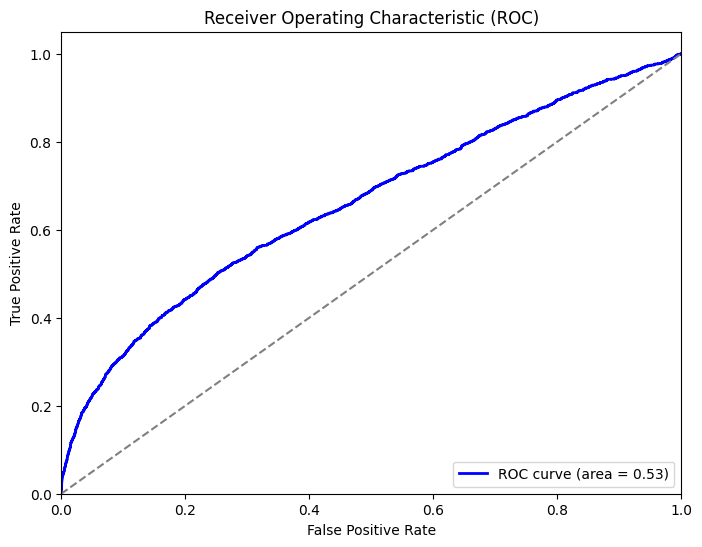

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(X_train_0.shape)
print(X_test_1.shape)


(48138, 67)
(1969, 67)


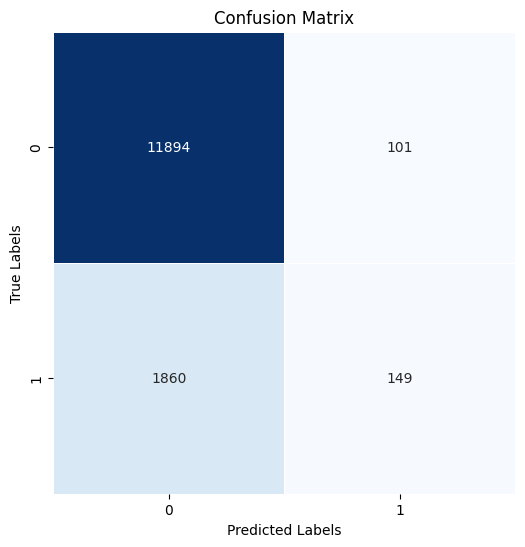

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load your dataset into 'data' DataFrame
data = data

# Define your dependent variable (target)
target_variable = 'ind_recommended'

# Define a list of independent variable column names
independent_variable_columns = ['customer_digital_activity_04', 'customer_spend_01', 'customer_industry_spend_01',
    'customer_industry_spend_02', 'customer_industry_spend_03', 'customer_industry_spend_04',
    'customer_industry_spend_05', 'customer_spend_02', 'customer_spend_03',
    'customer_merchant_02', 'customer_merchant_01', 'customer_spend_04',
    'customer_spend_05', 'customer_spend_06', 'customer_spend_07',
    'merchant_spend_01', 'merchant_spend_02', 'merchant_spend_03',
    'merchant_spend_04', 'merchant_spend_05', 'merchant_spend_06',
    'merchant_spend_07', 'merchant_spend_08', 'merchant_profile_01',
    'customer_merchant_03', 'customer_profile_01', 'customer_profile_02',
    'customer_digital_activity_05', 'customer_spend_13', 'customer_digital_activity_06',
    'customer_spend_14', 'customer_digital_activity_07', 'customer_digital_activity_08',
    'customer_digital_activity_09', 'customer_digital_activity_10', 'customer_digital_activity_11',
    'customer_digital_activity_12', 'customer_digital_activity_13', 'customer_digital_activity_14',
    'customer_digital_activity_15', 'customer_spend_15', 'customer_digital_activity_16',
    'customer_spend_16', 'customer_spend_17', 'customer_digital_activity_17',
    'customer_digital_activity_03', 'merchant_spend_11', 'customer_digital_activity_18',
    'customer_digital_activity_19', 'distance_01', 'customer_digital_activity_20',
    'distance_02', 'distance_03', 'customer_spend_18', 'customer_spend_19',
    'customer_digital_activity_21', 'customer_digital_activity_22', 'distance_04',
    'merchant_profile_02', 'merchant_spend_09', 'merchant_profile_03',
    'customer_digital_activity_01', 'merchant_spend_10', 'customer_profile_03',
    'customer_digital_activity_02', 'customer_profile_04', 'distance_05'
]

# Create your X (independent variables) and y (dependent variable) datasets
X = data[independent_variable_columns]
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the independent variables (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the probability of class 1 for both subsets (ind_recommended=1 and ind_recommended=0)
y_prob_1 = model.predict_proba(X_test)[:, 1]

# Filter the data for ind_recommended=0 and calculate the probability of class 1
data_ind_0 = data[data[target_variable] == 0]
X_ind_0 = data_ind_0[independent_variable_columns]
X_ind_0 = scaler.transform(X_ind_0)
y_prob_0 = model.predict_proba(X_ind_0)[:, 1]

# Calculate the objective function P(Y=1| ind_recommended=1) - P(Y=1| ind_recommended=0)
objective_function_result = y_prob_1.mean() - y_prob_0.mean()

print(f"Objective Function Result: {objective_function_result}")


Objective Function Result: 0.010844040443143965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the probability of class 1 for both subsets (ind_recommended=1 and ind_recommended=0)
y_prob_1 = model.predict_proba(X_test)[:, 1]

# Filter the data for ind_recommended=0 and calculate the probability of class 1
data_ind_0 = data[data['recommended_column'] == 0]
X_ind_0 = data_ind_0[independent_variable_columns]
X_ind_0 = scaler.transform(X_ind_0)
y_prob_0 = model.predict_proba(X_ind_0)[:, 1]

# Calculate the objective function P(Y=1| ind_recommended=1) - P(Y=1| ind_recommended=0)
objective_function_result = y_prob_1.mean() - y_prob_0.mean()

print(f"Objective Function Result: {objective_function_result}")

KeyError: ignored

In [ ]:
data

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,1,0,58.339167,0.000000,0.0,0.00,0.0,0.0,12.0,...,30727.0,13279.0,0.000000,37.565000,100.000000,7.833333,149.0,2.752404,148827,530663
1,0,1,0,151.697063,0.000000,0.0,0.00,0.0,0.0,26.0,...,1258.0,477.0,0.450000,29.741667,99.917223,4.500000,281.0,0.382067,23657,513538
2,0,1,0,751.174000,0.000000,0.0,0.00,0.0,0.0,5.0,...,12902.0,10738.0,0.000000,44.870000,100.000000,7.666667,207.0,9.045971,24044,420602
3,0,1,0,37.104048,0.000000,0.0,0.00,0.0,0.0,23.0,...,7102.0,10297.0,1.000000,26.860000,41.906829,3.166667,255.0,13.564134,24054,77882
4,0,1,0,91.386250,0.000000,0.0,0.00,0.0,0.0,7.0,...,3502.0,90070.0,0.028571,105.646000,85.078148,2.500000,486.0,2.553745,24736,243357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70011,1,1,6,79.576111,0.000000,0.0,0.00,0.0,0.0,8.0,...,92936.0,15507.0,0.775000,12.255000,99.964033,5.666667,373.0,0.627434,291934,275105
70012,1,1,0,154.120952,270.676667,3.0,1624.06,6.0,5.0,40.0,...,440.0,319.0,0.166667,55.795918,98.670769,59.666667,138.0,8.393455,437967,550725
70013,1,1,0,23.724000,0.000000,0.0,0.00,0.0,0.0,2.0,...,201.0,146.0,0.083333,6.470000,14.889388,2.166667,44.0,2.099189,269984,507060
70014,1,1,0,117.329474,0.000000,0.0,0.00,0.0,0.0,21.0,...,15873.0,2371.0,0.962264,51.640000,99.905681,15.166667,451.0,0.512343,51509,66907


In [ ]:
import pandas as pd
import numpy as np

# Load your Round 1/2 submission data into 'submission_data' DataFrame
submission_data = data

# Make predictions for all Customer x Merchant combinations
X_submission = data['customer_digital_activity_04', 'customer_spend_01', 'customer_industry_spend_01',
    'customer_industry_spend_02', 'customer_industry_spend_03', 'customer_industry_spend_04',
    'customer_industry_spend_05', 'customer_spend_02', 'customer_spend_03',
    'customer_merchant_02', 'customer_merchant_01', 'customer_spend_04',
    'customer_spend_05', 'customer_spend_06', 'customer_spend_07',
    'merchant_spend_01', 'merchant_spend_02', 'merchant_spend_03',
    'merchant_spend_04', 'merchant_spend_05', 'merchant_spend_06',
    'merchant_spend_07', 'merchant_spend_08', 'merchant_profile_01',
    'customer_merchant_03', 'customer_profile_01', 'customer_profile_02',
    'customer_digital_activity_05', 'customer_spend_13', 'customer_digital_activity_06',
    'customer_spend_14', 'customer_digital_activity_07', 'customer_digital_activity_08',
    'customer_digital_activity_09', 'customer_digital_activity_10', 'customer_digital_activity_11',
    'customer_digital_activity_12', 'customer_digital_activity_13', 'customer_digital_activity_14',
    'customer_digital_activity_15', 'customer_spend_15', 'customer_digital_activity_16',
    'customer_spend_16', 'customer_spend_17', 'customer_digital_activity_17',
    'customer_digital_activity_03', 'merchant_spend_11', 'customer_digital_activity_18',
    'customer_digital_activity_19', 'distance_01', 'customer_digital_activity_20',
    'distance_02', 'distance_03', 'customer_spend_18', 'customer_spend_19',
    'customer_digital_activity_21', 'customer_digital_activity_22', 'distance_04',
    'merchant_profile_02', 'merchant_spend_09', 'merchant_profile_03',
    'customer_digital_activity_01', 'merchant_spend_10', 'customer_profile_03',
    'customer_digital_activity_02', 'customer_profile_04', 'distance_05'
]
submission_data['predicted_prob'] = model.predict_proba(X_submission)[:, 1]

# Define a function to calculate Incremental Activation Rate (IAR)
def calculate_IAR(predictions):
    num_activations = sum(predictions)
    num_recommendations = len(predictions)
    return num_activations / num_recommendations

# Group the submission data by Customer and sort each group by predicted_prob in descending order
submission_data.sort_values(by=['Customer', 'predicted_prob'], ascending=[True, False], inplace=True)

# Calculate the Incremental Activation Rate (IAR) for each Customer x Merchant combination
submission_data['IAR'] = submission_data.groupby('Customer')['predicted_prob'].transform(calculate_IAR)

# Select the top 10 combinations with the highest IAR for each Customer
top_10_combinations = submission_data.groupby('Customer').head(10)

# Assign scores to the selected combinations (you can use any scoring logic here)
top_10_combinations['predicted_score'] = np.arange(1, 11)

# Create a DataFrame with Customer, Merchant, and predicted_score columns
final_output = top_10_combinations[['Customer', 'Merchant', 'predicted_score']]

# Save the final output to a CSV file
final_output.to_csv('predicted_scores.csv', index=False)


KeyError: ignored

In [ ]:
# Load your dataset into 'data' DataFrame
data = data = pd.read_excel('/content/train_filtered.xlsx')  # Replace 'your_dataset.csv' with your dataset file
  # Replace 'your_dataset.csv' with your dataset file

# Impute all missing values with 0
data.fillna(0, inplace=True)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load your dataset into 'data' DataFrame
data = data

# Define your dependent variable (target)
target_variable = 'ind_recommended'

# Define a list of independent variable column names
independent_variable_columns = ['customer_digital_activity_04', 'customer_spend_01', 'customer_industry_spend_01',
    'customer_industry_spend_02', 'customer_industry_spend_03', 'customer_industry_spend_04',
    'customer_industry_spend_05', 'customer_spend_02', 'customer_spend_03',
    'customer_merchant_02', 'customer_merchant_01', 'customer_spend_04',
    'customer_spend_05', 'customer_spend_06', 'customer_spend_07',
    'merchant_spend_01', 'merchant_spend_02', 'merchant_spend_03',
    'merchant_spend_04', 'merchant_spend_05', 'merchant_spend_06',
    'merchant_spend_07', 'merchant_spend_08', 'merchant_profile_01',
    'customer_merchant_03', 'customer_profile_01', 'customer_profile_02',
    'customer_digital_activity_05', 'customer_spend_13', 'customer_digital_activity_06',
    'customer_spend_14', 'customer_digital_activity_07', 'customer_digital_activity_08',
    'customer_digital_activity_09', 'customer_digital_activity_10', 'customer_digital_activity_11',
    'customer_digital_activity_12', 'customer_digital_activity_13', 'customer_digital_activity_14',
    'customer_digital_activity_15', 'customer_spend_15', 'customer_digital_activity_16',
    'customer_spend_16', 'customer_spend_17', 'customer_digital_activity_17',
    'customer_digital_activity_03', 'merchant_spend_11', 'customer_digital_activity_18',
    'customer_digital_activity_19', 'distance_01', 'customer_digital_activity_20',
    'distance_02', 'distance_03', 'customer_spend_18', 'customer_spend_19',
    'customer_digital_activity_21', 'customer_digital_activity_22', 'distance_04',
    'merchant_profile_02', 'merchant_spend_09', 'merchant_profile_03',
    'customer_digital_activity_01', 'merchant_spend_10', 'customer_profile_03',
    'customer_digital_activity_02', 'customer_profile_04', 'distance_05'
    # Your list of independent variables here
]

# Create your X (independent variables) and y (dependent variable) datasets
X = data[independent_variable_columns]
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the independent variables (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on your training data
model.fit(X_train, y_train)

# Predict the probabilities for both classes (0 and 1)
y_prob = model.predict_proba(X_test)  # This gives you probabilities for both classes

# Calculate P(Y=1|ind_recommendation=1)
prob_class_1 = y_prob[:, 1]

# Calculate P(Y=0|ind_recommendation=0)
prob_class_0 = y_prob[:, 0]

# Compute the desired difference: P(Y=1|ind_recommendation=1) - P(Y=0|ind_recommendation=0)
difference = prob_class_1 - prob_class_0

# Now, 'difference' contains the predicted difference between the two probabilities
# for each sample in your test data.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
